<a href="https://colab.research.google.com/github/fzry18/PA-Datmin-C1-1/blob/main/PA_kelompok_C1_1%20(UNSUPERVISED).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis CRISP-DM UnSupervised Data

## 1. Business Understanding

* Prediksi Tingkat Prestasi Akademik: Dataset ini dapat digunakan untuk membangun model prediksi yang dapat memperkirakan tingkat prestasi akademik atau level siswa berdasarkan atribut-atribut yang diberikan. Informasi seperti usia, jenis kelamin, penghasilan orang tua, dan jumlah anggota keluarga dapat digunakan sebagai fitur untuk memprediksi tingkat prestasi akademik siswa, yang dapat membantu lembaga pendidikan atau penyedia layanan pendidikan dalam mengidentifikasi siswa yang berpotensi membutuhkan dukungan tambahan atau mengambil tindakan pencegahan dini terhadap siswa yang berisiko.

* Identifikasi Faktor-faktor yang Mempengaruhi Prestasi Akademik: Dataset ini juga dapat digunakan untuk melakukan analisis eksploratif untuk mengidentifikasi faktor-faktor yang mempengaruhi prestasi akademik siswa. Misalnya, dapat dilakukan analisis untuk melihat hubungan antara usia atau penghasilan orang tua dengan tingkat prestasi akademik siswa, atau bagaimana faktor-faktor lain seperti jenis kelamin atau jumlah anggota keluarga dapat berdampak pada tingkat prestasi akademik siswa.

* Segmentasi Siswa: Dataset ini dapat digunakan untuk melakukan segmentasi siswa berdasarkan karakteristik yang diberikan, seperti usia, jenis kelamin, penghasilan orang tua, dan jumlah anggota keluarga. Segmentasi siswa ini dapat membantu lembaga pendidikan atau penyedia layanan pendidikan dalam memahami profil siswa yang berbeda-beda, serta merancang strategi pemasaran atau program pendidikan yang sesuai untuk setiap segmen.

* Pengambilan Keputusan Berbasis Data: Dataset ini dapat digunakan sebagai dasar untuk pengambilan keputusan berbasis data dalam konteks pendidikan. Dengan memanfaatkan data yang ada, lembaga pendidikan atau penyedia layanan pendidikan dapat membuat keputusan yang lebih informasional dan akurat dalam menghadapi tantangan atau mengidentifikasi peluang dalam meningkatkan prestasi akademik siswa.

* Evaluasi Kebijakan atau Program Pendidikan: Dataset ini juga dapat digunakan untuk mengevaluasi efektivitas kebijakan atau program pendidikan yang telah diterapkan. Dengan menganalisis data yang ada, lembaga pendidikan atau penyedia layanan pendidikan dapat mengukur sejauh mana kebijakan atau program yang telah diimplementasikan telah berdampak pada tingkat prestasi akademik siswa, dan melakukan perbaikan atau penyesuaian kebijakan atau program yang ada jika diperlukan.

## 2.   DATA UNDERSTANDING


1. Collect Data
2. Penjelasan Setiap Kolom
3. Visualisasi dan Artinya

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset ke dalam DataFrame
df2 = pd.read_csv("https://raw.githubusercontent.com/syarulrama/dataset/main/Predict_student_knowledge_level.csv")

# Cek dimensi dan tipe data
print(df2.shape)
print(df2.dtypes)

# Cek nilai yang hilang dan statistik deskriptif
print(df2.isna().sum())
print(df2.describe())

(403, 6)
STG     float64
SCG     float64
STR     float64
LPR     float64
PEG     float64
 UNS     object
dtype: object
STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64
              STG         SCG         STR         LPR         PEG
count  403.000000  403.000000  403.000000  403.000000  403.000000
mean     0.353141    0.355940    0.457655    0.431342    0.456360
std      0.212018    0.215531    0.246684    0.257545    0.266775
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.200000    0.200000    0.265000    0.250000    0.250000
50%      0.300000    0.300000    0.440000    0.330000    0.400000
75%      0.480000    0.510000    0.680000    0.650000    0.660000
max      0.990000    0.900000    0.950000    0.990000    0.990000


### Describe Data

In [ ]:
df2

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89,High
399,0.85,0.82,0.66,0.83,0.83,High
400,0.56,0.60,0.77,0.13,0.32,Low
401,0.66,0.68,0.81,0.57,0.57,Middle


### Deskripsi setiap kolom

In [ ]:
df2.info()

# Dataset ini memiliki 403 baris dan 6 kolom

# STG: Rata-rata kinerja siswa dalam tugas sebelumnya
# SCG: Rata-rata kinerja siswa dalam ujian sebelumnya
# STR: Tingkat pemahaman siswa terhadap materi yang diajarkan
# LPR: Tingkat kualitas hubungan antara siswa dan dosen
# PEG: Tingkat penilaian dosen terhadap kinerja siswa
# UNS: Nilai akhir siswa 

# Semua kolom diatas menggunakan skala 0-1, di mana 0 merupakan nilai terendah dan 1 merupakan nilai tertinggi.

# Atribut-atribut ini dapat digunakan sebagai fitur untuk melakukan prediksi tingkat prestasi akademik siswa berdasarkan kinerja siswa dalam tugas, ujian, tingkat pemahaman, hubungan dengan dosen, penilaian dosen, dan nilai akhir yang telah diberikan dalam dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5    UNS    403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


In [ ]:
# Menampilkan 5 data teratas dalam DataFrame
print(df2.head())

# Menampilkan statistik deskriptif dari dataset
print(df2.describe())

# Menampilkan jumlah nilai unik pada setiap kolom
print(df2.nunique())


    STG   SCG   STR   LPR   PEG       UNS
0  0.00  0.00  0.00  0.00  0.00  very_low
1  0.08  0.08  0.10  0.24  0.90      High
2  0.06  0.06  0.05  0.25  0.33       Low
3  0.10  0.10  0.15  0.65  0.30    Middle
4  0.08  0.08  0.08  0.98  0.24       Low
              STG         SCG         STR         LPR         PEG
count  403.000000  403.000000  403.000000  403.000000  403.000000
mean     0.353141    0.355940    0.457655    0.431342    0.456360
std      0.212018    0.215531    0.246684    0.257545    0.266775
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.200000    0.200000    0.265000    0.250000    0.250000
50%      0.300000    0.300000    0.440000    0.330000    0.400000
75%      0.480000    0.510000    0.680000    0.650000    0.660000
max      0.990000    0.900000    0.950000    0.990000    0.990000
STG     112
SCG     103
STR      94
LPR      93
PEG      89
 UNS      5
dtype: int64


In [ ]:
len(df2)

403

### Analisis setiap kolom

In [ ]:
# Menghitung rata-rata dari masing-masing kolom
mean_values = df2.mean()
print(mean_values)

# Menghitung median dari masing-masing kolom
median_values = df2.median()
print(median_values)

# Menghitung standar deviasi dari masing-masing kolom
std_values = df2.std()
print(std_values)

# Menghitung korelasi antara kolom-kolom dataset
correlation = df2.corr()
print(correlation)


STG    0.353141
SCG    0.355940
STR    0.457655
LPR    0.431342
PEG    0.456360
dtype: float64
STG    0.30
SCG    0.30
STR    0.44
LPR    0.33
PEG    0.40
dtype: float64
STG    0.212018
SCG    0.215531
STR    0.246684
LPR    0.257545
PEG    0.266775
dtype: float64
          STG       SCG       STR       LPR       PEG
STG  1.000000  0.049023 -0.051889  0.113957  0.198629
SCG  0.049023  1.000000  0.121235  0.119716  0.193566
STR -0.051889  0.121235  1.000000  0.083423  0.148338
LPR  0.113957  0.119716  0.083423  1.000000 -0.039283
PEG  0.198629  0.193566  0.148338 -0.039283  1.000000


<ipython-input-81-38bb079d530a>:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-81-38bb079d530a>:6: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-81-38bb079d530a>:10: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-81-38bb079d530a>:14: FutureWarning:

The def

### Visualisai dan penjelasan (menggunakan Matplotlib atau Seaborn)

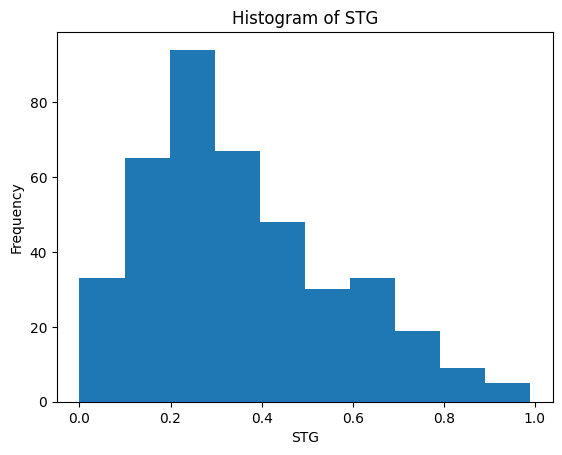

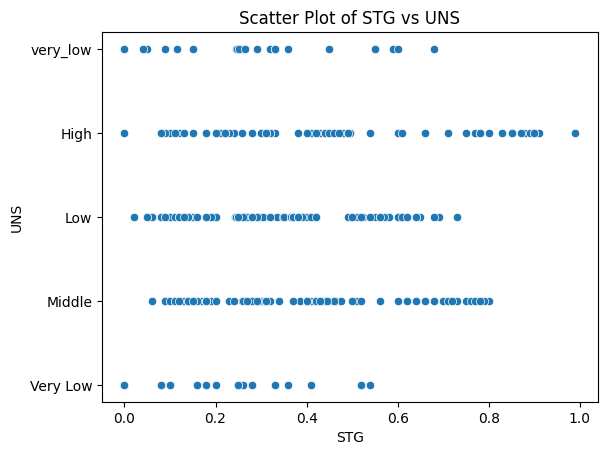

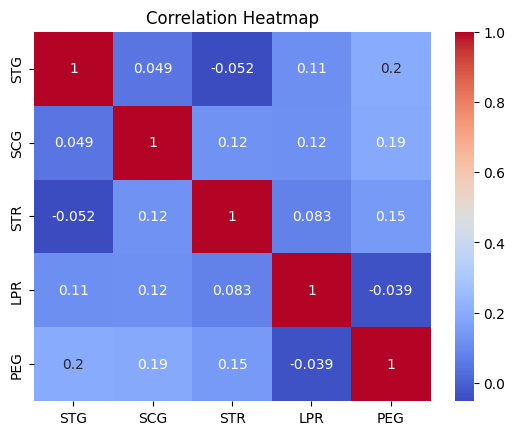

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan histogram dari kolom 'STG'
plt.hist(df2['STG'])
plt.xlabel('STG')
plt.ylabel('Frequency')
plt.title('Histogram of STG')
plt.show()

# Menampilkan scatter plot antara 'STG' dan 'UNS'
sns.scatterplot(x='STG', y=' UNS', data=df2
)
plt.xlabel('STG')
plt.ylabel('UNS')
plt.title('Scatter Plot of STG vs UNS')
plt.show()

# Menampilkan heatmap korelasi antara kolom-kolom dataset
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


visualisasi ini membantu kita dalam memahami data dengan lebih baik dan memungkinkan kita untuk menemukan pola atau tren yang mungkin tidak terlihat dari sekadar melihat tabel data mentah.

## 3. DATA PREPARATION

### Melakukan pengubahan nama kolom

In [ ]:
# Mengubah nama kolom ' UNS' menjadi 'UNS'
df2.rename(columns={' UNS': 'UNS'}, inplace=True)

# Encoding kolom kategori menjadi numerik
encoder = LabelEncoder()
df2["UNS"] = encoder.fit_transform(df2["UNS"])



### Menghapus kolom yang tidak diperlukan

In [ ]:
import pandas as pd

# Drop kolom yang tidak diperlukan
df2.drop(['STR', 'LPR'], axis=1, inplace=True)


In [ ]:
# Mengganti nilai NaN pada kolom 'STG' dan 'SCG' dengan nilai median
# median_stg = df2['STG'].median()
# df2['STG'].fillna(median_stg, inplace=True)

# median_scg = df2['SCG'].median()
# df2['SCG'].fillna(median_scg, inplace=True)


### Melakukan normalisasi data

In [ ]:
import numpy as np

# Melakukan min-max scaling pada kolom 'PEG' dan 'SCG'
df2['PEG'] = (df2['PEG'] - df2['PEG'].min()) / (df2['PEG'].max() - df2['PEG'].min())
df2['SCG'] = (df2['SCG'] - df2['SCG'].min()) / (df2['SCG'].max() - df2['SCG'].min())


### Melakukan konversi tipe data 

In [ ]:
# Mengubah tipe data kolom 'STG' dan 'SCG' menjadi float
df2['STG'] = df2['STG'].astype(float)
df2['SCG'] = df2['SCG'].astype(float)




In [ ]:
df2.info()

df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   PEG     403 non-null    float64
 3   UNS     403 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 12.7 KB


,STG,SCG,PEG,UNS
0,0.00,0.000000,0.000000,4
1,0.08,0.088889,0.909091,0
2,0.06,0.066667,0.333333,1
3,0.10,0.111111,0.303030,2
4,0.08,0.088889,0.242424,1
...,...,...,...,...
398,0.90,0.866667,0.898990,0
399,0.85,0.911111,0.838384,0
400,0.56,0.666667,0.323232,1
401,0.66,0.755556,0.575758,2


### Melakukan penghapusan duplikat data

In [ ]:
# Menghapus duplikat data berdasarkan semua kolom
df2.drop_duplicates(inplace=True)

df2

,STG,SCG,PEG,UNS
0,0.00,0.000000,0.000000,4
1,0.08,0.088889,0.909091,0
2,0.06,0.066667,0.333333,1
3,0.10,0.111111,0.303030,2
4,0.08,0.088889,0.242424,1
...,...,...,...,...
398,0.90,0.866667,0.898990,0
399,0.85,0.911111,0.838384,0
400,0.56,0.666667,0.323232,1
401,0.66,0.755556,0.575758,2


### 

In [ ]:
df2.replace 

<bound method DataFrame.replace of       STG       SCG       PEG  UNS
0    0.00  0.000000  0.000000    4
1    0.08  0.088889  0.909091    0
2    0.06  0.066667  0.333333    1
3    0.10  0.111111  0.303030    2
4    0.08  0.088889  0.242424    1
..    ...       ...       ...  ...
398  0.90  0.866667  0.898990    0
399  0.85  0.911111  0.838384    0
400  0.56  0.666667  0.323232    1
401  0.66  0.755556  0.575758    2
402  0.68  0.711111  0.242424    2

[400 rows x 4 columns]>

## 4. DATA MODELLING

In [ ]:
X_train = pd.get_dummies(df2)
X_train.columns

Index(['STG', 'SCG', 'PEG', 'UNS'], dtype='object')

In [ ]:
# Untuk Clustering
from sklearn.cluster import KMeans


# Untuk scalling dan normalisasi
from sklearn.preprocessing import StandardScaler

# Metric Pengukuran
# sumber : https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

import numpy as np


In [ ]:
# PreProcessing
# Encoding DataTraining
X_train = pd.get_dummies(df2)



### Kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

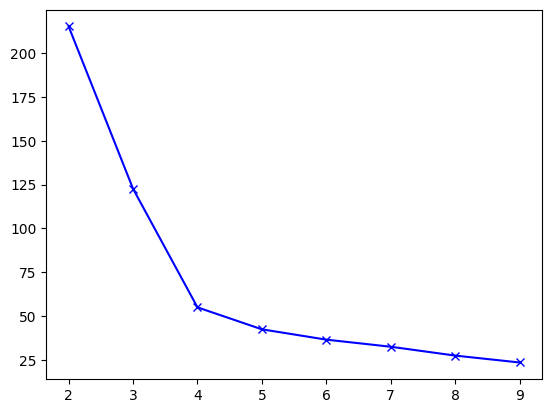

In [ ]:
sse = [] #Daftar SSE
K = range(2,10) #Banyak Cluster hingga 30
# # Perulangan hingga 30 Cluster
for k in K:
    kmeans = KMeans(n_clusters= k,random_state=42).fit(X_train)
#     #Mendapatkan SSE dan append ke list sse
    sse.append(kmeans.inertia_)

# # Membuat plot K terhadap SSE
plt.plot(K,sse, "bx-")
# import warnings
# warnings.filterwarnings("ignore")
# elbow_scores = []
# k_range = range(2, 10)
# for k in k_range:
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(X_train)
#     elbow_scores.append(kmeans.inertia_)

# plt.plot(k_range, elbow_scores,"bx-")
# plt.xlabel('Jumlah Kluster (K)')
# plt.ylabel('WCSS')
# plt.title('Elbow Method')
# plt.show()
  

Plot diatas untuk membantu kita dalam menentukan jumlah cluster optimal untuk model K-Means yang akan digunakan pada data.

In [ ]:
class Kmeans:
    """The k-means algorithm."""

    def __init__(self, n_clusters):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))

        if 'species' in self.data.columns:
            self.data.drop('species', axis=1, inplace=True)

        # Randomly initialize centroids
        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters)
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nRandomly initiated centroids:")
            print(self.centroids)

        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        # Compare every data point in our dataset to each of the k-means and assign each point to closest cluster
        while not self.old_centroids.equals(self.centroids):
            
            if self.verbose:
                time.sleep(3)

            # Stash old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            # Iterate through each data point in the matrix
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                # Calculate the distance between the current point and each of the centroids
                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                # Assign this data point to a cluster
                self.clusters[row_i] = np.argmin(distances)

            # For each cluster extract the values which now belong to each cluster and calculate new k-means
            for cls in range(0, self.n_clusters):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    # Set the new k-mean to the mean value of the data points within this cluster
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()
                    
                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)

##### Algoritma k-means digunakan untuk mengelompokkan data ke dalam k kelompok (clusters) berdasarkan jarak Euclidean antara titik data dan pusat kelompok.

Kelas Kmeans memiliki beberapa atribut, yaitu data (DataFrame), n_clusters (jumlah kelompok), centroids (pusat kelompok), clusters (array yang menyimpan indeks kelompok untuk setiap titik data), old_centroids (pusat kelompok dari iterasi sebelumnya), verbose (variabel boolean yang menentukan apakah algoritma akan mencetak informasi ke konsol), dan predictions (daftar yang menyimpan prediksi kelompok untuk setiap titik data).

In [ ]:
kmeans = Kmeans(n_clusters = 3)
kmeans.train(df=X_train, verbose = False)


##### Codingan di atas digunakan untuk membuat sebuah objek kmeans dengan memanggil kelas Kmeans dan menginisialisasi parameter n_clusters dengan nilai 3. Kemudian, objek kmeans di latih menggunakan data X_train dengan memanggil metode train pada objek kmeans.

In [ ]:
X_train['cluster']=kmeans.clusters
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
all_df = pd.concat([X_train, centroids])

##### Codingan di atas digunakan untuk menambahkan kolom cluster pada X_train yang berisi informasi tentang cluster yang telah dihasilkan oleh algoritma k-means.

In [ ]:
all_df

,STG,SCG,PEG,UNS,cluster
0,0.000000,0.000000,0.000000,4.000000,0.0
1,0.080000,0.088889,0.909091,0.000000,1.0
2,0.060000,0.066667,0.333333,1.000000,2.0
3,0.100000,0.111111,0.303030,2.000000,0.0
4,0.080000,0.088889,0.242424,1.000000,2.0
...,...,...,...,...,...
401,0.660000,0.755556,0.575758,2.000000,0.0
402,0.680000,0.711111,0.242424,2.000000,0.0
0,0.342865,0.372758,0.409091,2.429412,centroid
1,0.408950,0.477679,0.808081,0.000000,centroid


#### Mengembalikan data yang sudah di encoding dan membuat dataframe baru yaitu X_train_decoded

In [ ]:
# Membuat DataFrame kosong untuk hasil decode
X_train_decoded = pd.DataFrame()

# Menambahkan kolom-kolom numerik
X_train_decoded['STG'] = all_df['STG']
X_train_decoded['SCG'] = all_df['SCG']
X_train_decoded['PEG'] = all_df['PEG']
X_train_decoded['UNS'] = all_df['UNS']
X_train_decoded['cluster'] = all_df['cluster']
X_train_decoded


,STG,SCG,PEG,UNS,cluster
0,0.000000,0.000000,0.000000,4.000000,0.0
1,0.080000,0.088889,0.909091,0.000000,1.0
2,0.060000,0.066667,0.333333,1.000000,2.0
3,0.100000,0.111111,0.303030,2.000000,0.0
4,0.080000,0.088889,0.242424,1.000000,2.0
...,...,...,...,...,...
401,0.660000,0.755556,0.575758,2.000000,0.0
402,0.680000,0.711111,0.242424,2.000000,0.0
0,0.342865,0.372758,0.409091,2.429412,centroid
1,0.408950,0.477679,0.808081,0.000000,centroid


In [ ]:
import plotly.express as px
px.scatter_3d(X_train_decoded, x='STG', y='SCG', z='PEG', color='cluster',color_continuous_scale=['#ADFF2F', '#19A3E8', '#FF5A44', '#FFD326'])

##### visualisasi 3D scatter plot dengan menggunakan library Plotly Express. Pada scatter plot tersebut, sumbu x, y, dan z diisi dengan nilai 'STG', 'SCG', dan 'PEG' dari dataset X_train_decoded. Sedangkan warna titik-titik pada scatter plot diatur oleh kolom 'cluster' pada dataset, dan warna tersebut ditampilkan dalam skala warna yang diatur oleh parameter 'color_continuous_scale'.

## Analisis Cluster

In [ ]:
def plot_cluster(cluster_df):
    plot, ax = plt.subplots(3,4,figsize=(55,15),constrained_layout=True)
    cols = ['STG', 'SCG', 'PEG']
    category_counts = cluster_df['UNS'].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax[2][2])
    for i,col in enumerate(cols):
        sns.histplot(data=cluster_df, x=col, ax=ax[0][i], kde=True)
        sns.boxplot(data=cluster_df, x=col, ax=ax[1][i])
    sns.countplot(data=cluster_df, x="STG", ax=ax[2][0])
    sns.countplot(data=cluster_df, x="SCG", ax=ax[2][1])
    sns.countplot(data=cluster_df, x="PEG", ax=ax[2][3])

Fungsi plot_cluster digunakan untuk membuat visualisasi grafik berupa histogram, boxplot, dan countplot untuk setiap fitur pada dataset yang sudah dibagi ke dalam masing-masing cluster

Untuk menjelaskan tiap tiap cluster

In [ ]:
cluster1 = X_train_decoded[X_train_decoded['cluster'] == 0]
cluster2 = X_train_decoded[X_train_decoded['cluster'] == 1]
cluster3 = X_train_decoded[X_train_decoded['cluster'] == 2]

In [ ]:
cluster1.describe()

,STG,SCG,PEG,UNS
count,170.000000,170.000000,170.000000,170.000000
mean,0.342865,0.372758,0.409091,2.429412
std,0.207307,0.227723,0.230363,0.728348
min,0.000000,0.000000,0.000000,2.000000
25%,0.180000,0.200000,0.136364,2.000000
50%,0.295000,0.311111,0.515152,2.000000
75%,0.457500,0.566667,0.606061,3.000000
max,0.800000,0.944444,0.838384,4.000000


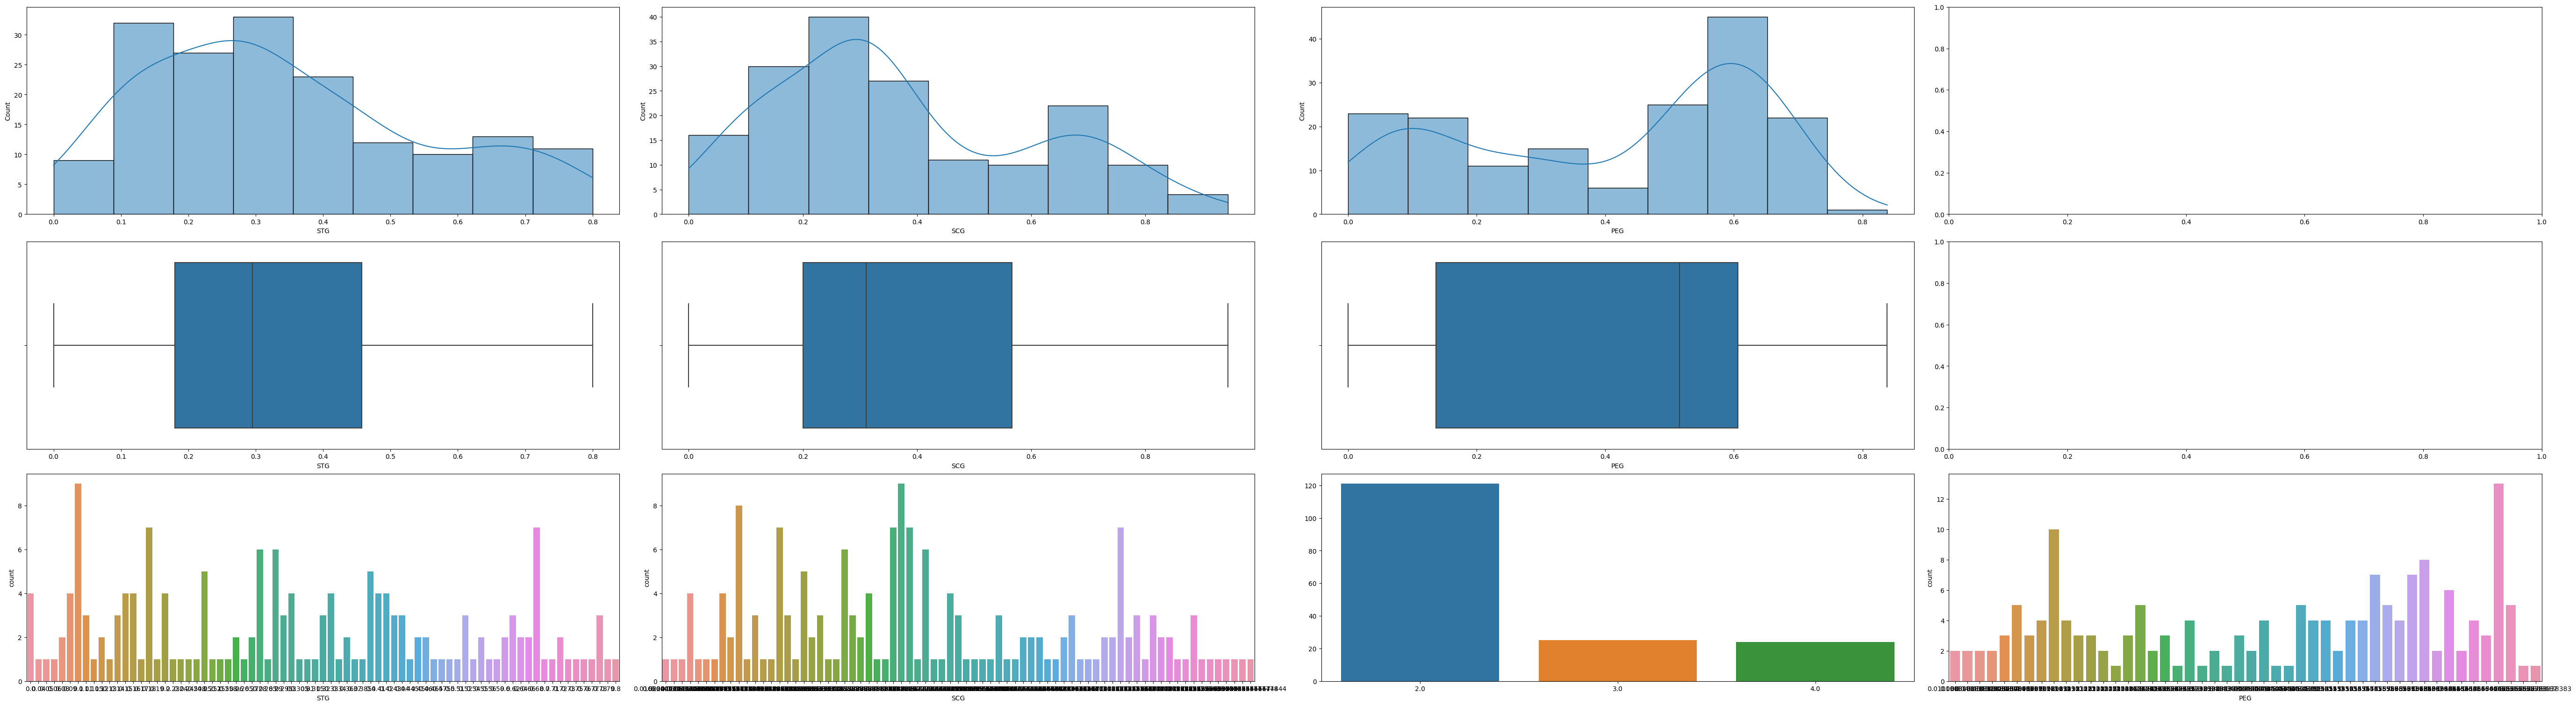

In [ ]:
# Menampilkan distribusi dari cluster1
plot_cluster(cluster1)

Ciri-ciri cluster1
> STG memiliki mean senilai 0.342865

> Nilai median: nilai median setiap variabel berbeda-beda, yang menunjukkan bahwa terdapat perbedaan distribusi data antara variabel satu dengan yang lain. Nilai median STG dan SCG di bawah 0.5, sedangkan PEG di atas 0.5. Sementara itu, nilai median UNS adalah 2.

In [ ]:
# Menampilkan deskripsi statistik dari cluster 2
cluster2.describe()

,STG,SCG,PEG,UNS
count,101.000000,101.000000,101.000000,101.0
mean,0.408950,0.477679,0.808081,0.0
std,0.246839,0.273126,0.111377,0.0
min,0.000000,0.000000,0.474747,0.0
25%,0.220000,0.277778,0.777778,0.0
50%,0.320000,0.366667,0.818182,0.0
75%,0.495000,0.677778,0.888889,0.0
max,0.990000,1.000000,1.000000,0.0


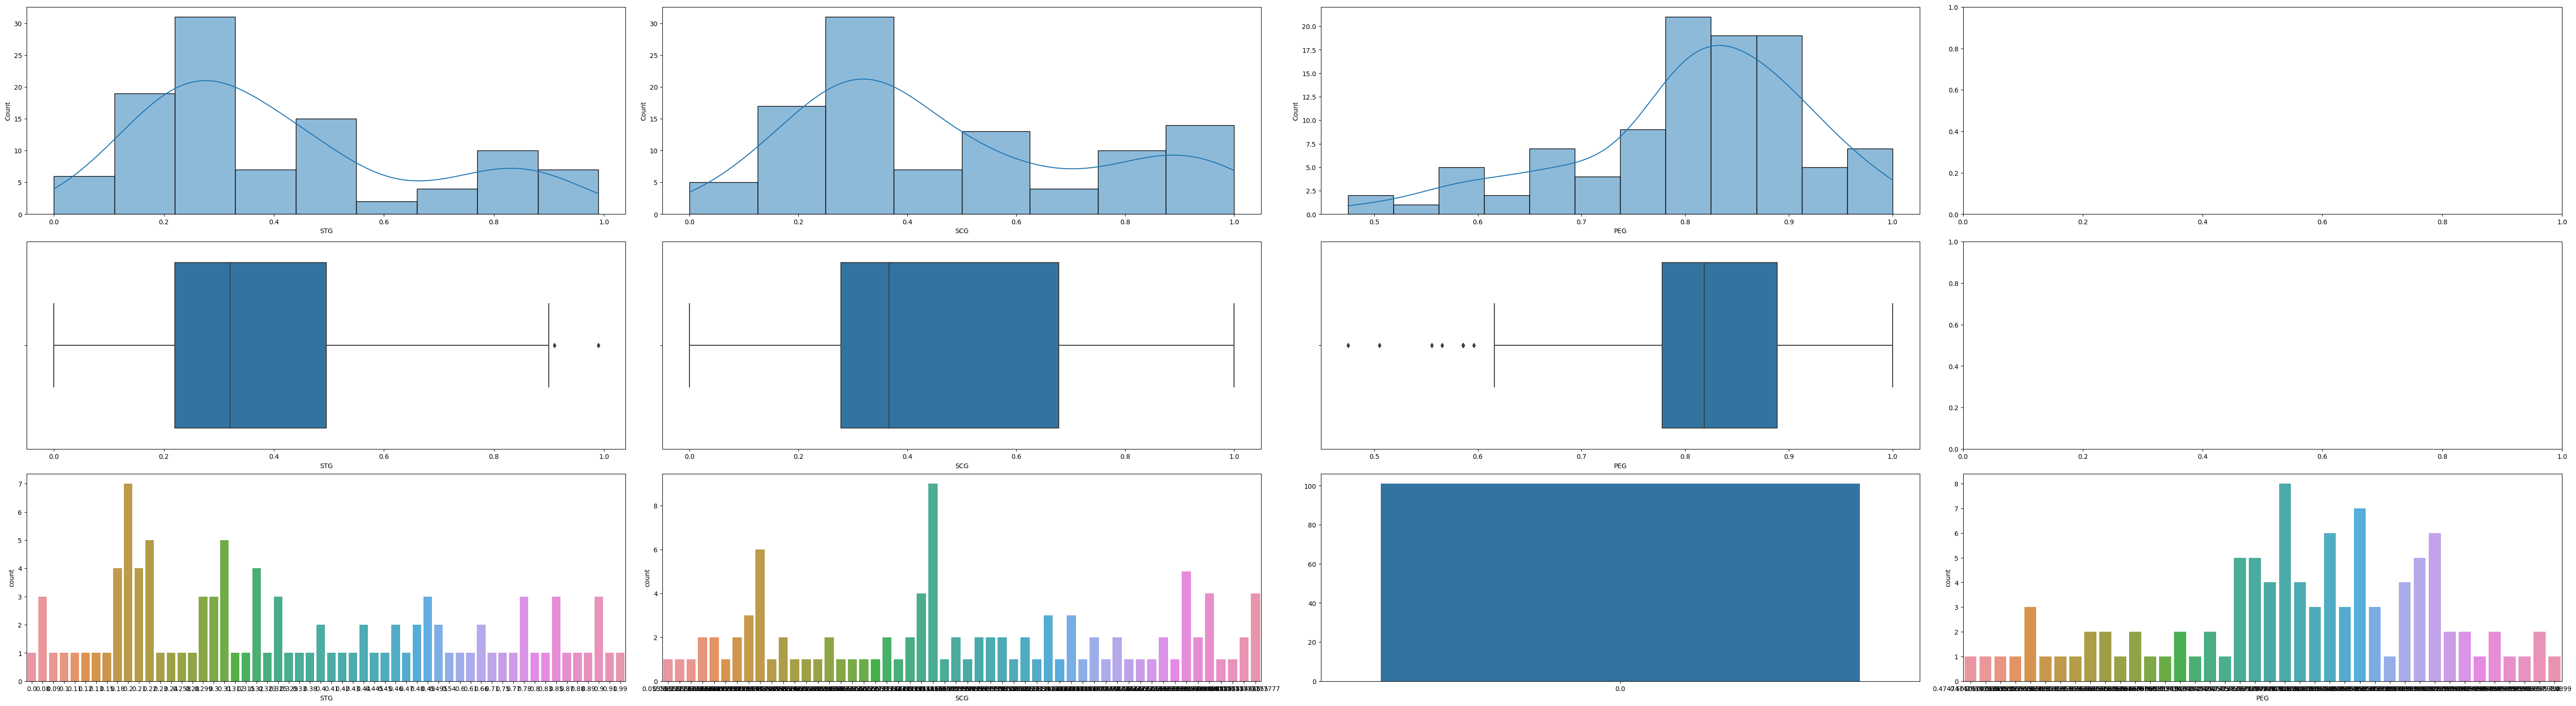

In [ ]:
# Menampilkan deskripsi statistik dari cluster 2
plot_cluster(cluster2)

In [ ]:
# Menampilkan deskripsi statistik dari cluster 3
cluster3.describe()

,STG,SCG,PEG,UNS
count,129.000000,129.000000,129.000000,129.0
mean,0.326783,0.358665,0.256151,1.0
std,0.180934,0.213022,0.071849,0.0
min,0.020000,0.000000,0.010101,1.0
25%,0.180000,0.222222,0.212121,1.0
50%,0.290000,0.327778,0.272727,1.0
75%,0.420000,0.444444,0.313131,1.0
max,0.730000,0.944444,0.404040,1.0


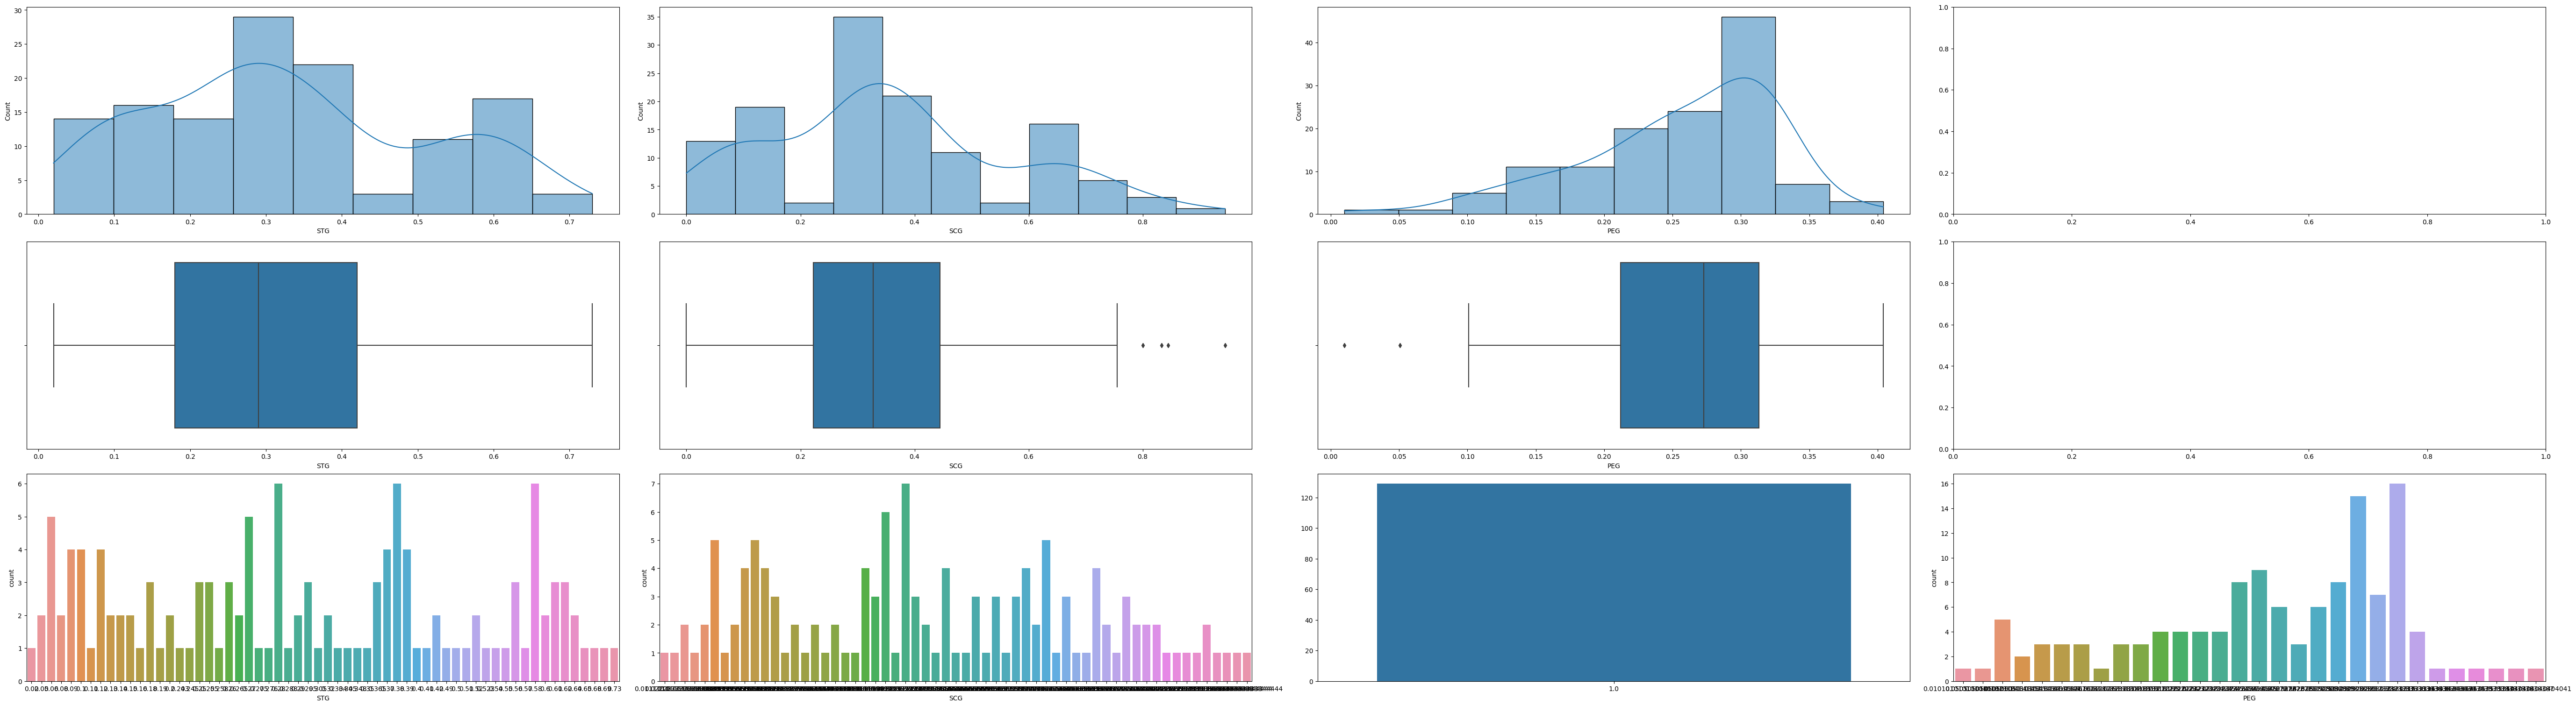

In [ ]:
# Menampilkan distribusi dari cluster3
plot_cluster(cluster3)

## 5. DATA EVALUATION

In [ ]:
# Menghitung nilai Silhouette Score
silhouette_avg = silhouette_score(X_train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Calinski-Harabasz Index
ch_score= calinski_harabasz_score(X_train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Davies-Bouldin Index
db_score= davies_bouldin_score(X_train.drop('cluster', axis=1), kmeans.clusters)

# Create dataframe for metrics and scores
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores = [silhouette_avg, ch_score, db_score]
df_scores = pd.DataFrame({'Metric': metrics, 'Score': scores})

# reset index dataframe
df_scores = df_scores.reset_index(drop=True)

# ubah nama axis pada index dan kolom
df_scores = df_scores.rename_axis('', axis=0).rename_axis('Metrics', axis=1)

# Display dataframe as table without index column
display(df_scores.style.hide_index())


<ipython-input-115-caf45928800c>:22: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`



Metric,Score
Silhouette Score,0.528928
Calinski-Harabasz Score,591.304221
Davies-Bouldin Score,0.639156


## 5. DEPLOYMENT

In [ ]:
# taruh dataframe kedalam dataset baru
X_train_decoded.to_csv('Predict_student_knowledge_level-Deplyoment.csv')
